In [208]:
import requests
import json

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.transforms import Bbox
plt.style.use('fivethirtyeight')

from collections import Counter

In [93]:
def retrieve_messages(channelid):
    headers = {
        'authorization': 'NTYzNzAyNzkzODM2NDI5MzI0.GEyFfS.lCit3JTnt37LSJsyWQ4XndPq1zUr4nr7fkuiPk'
#         'authorization': 'NTYzNzAyNzkzODM2NDI5MzI0.GEyFfS.lCit3JTnt37LSJsyWQ4XndPq1zUr4nr7fkuiPk'
    }
    # r = requests.get(
    #     f'https://discord.com/api/v9/channels/{channelid}/messages',headers=headers
    #     )
    # jsonn = json.loads(r.text)
    # for value in jsonn:
    #     # if value['content']=="Jadi saya kukasi' begini":
    #     #     print(value)
    #     print(f"{value['author']['username']}: {value['content']}", '\n')

    num = 0
    limit = 50

    last_message_id = None
    my_json= []

    while True:
        query_parameters = f'limit={limit}'
        if last_message_id is not None:
            query_parameters += f'&before={last_message_id}'

        r = requests.get(
            f'https://discord.com/api/v9/channels/{channelid}/messages?{query_parameters}', headers=headers
        )

        jsonn = json.loads(r.text)
        my_json.extend(jsonn)
        
        if len(jsonn) == 0:
            break

        for value in jsonn:
#             print(value['content'], '\n')
            last_message_id = value['id']
            num = num + 1

    print('number of messages we collected is', num)
    
    return my_json


In [94]:
data= retrieve_messages('671606793079619585')

number of messages we collected is 13157


In [149]:
df= pd.DataFrame(data)

df

,id,type,content,channel_id,author,attachments,embeds,mentions,mention_roles,pinned,mention_everyone,tts,timestamp,edited_timestamp,flags,components,reactions,thread,message_reference,referenced_message
0,996254659398336582,0,💀 emoji in game,671606793079619585,"{'id': '595394273529298958', 'username': 'ItsD...",[],[],[],[],False,False,False,2022-07-12T03:20:20.317000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
1,996189853995774083,0,make it possible to use the levitation of span...,671606793079619585,"{'id': '553200532353974282', 'username': 'Evya...",[],[],[],[],False,False,False,2022-07-11T23:02:49.505000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
2,996180226524594216,0,Add telekinesis book to /voteshop for 100vps,671606793079619585,"{'id': '787052140509397034', 'username': 'orsn...",[],[],[],[],False,False,False,2022-07-11T22:24:34.137000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
3,996174910667886592,0,No mic chat instead? edit: look at purple chat rn,671606793079619585,"{'id': '686408362761650225', 'username': 'Fish...",[],[],[],[],False,False,False,2022-07-11T22:03:26.738000+00:00,2022-07-11T22:13:27.776000+00:00,32,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...","{'id': '996174910667886592', 'guild_id': '2138...",NaN,NaN
4,996174743864606822,0,can we get back the music bot channel?,671606793079619585,"{'id': '534615231549145092', 'username': 'Chea...",[],[],[],[],False,False,False,2022-07-11T22:02:46.969000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13152,671613539215081492,0,"death chat on red world, punish inappropriate ...",671606793079619585,"{'id': '456226577798135808', 'username': 'Dele...",[],[],[],[],False,False,False,2020-01-28T07:12:25.725000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '👍'}, 'count':...",NaN,NaN,NaN
13153,671612224204439562,0,Less focus on the holiday events and more focu...,671606793079619585,"{'id': '488352342664675338', 'username': 'Cuti...",[],[],[],[],False,False,False,2020-01-28T07:07:12.202000+00:00,None,0,[],"[{'emoji': {'id': '585835226497024020', 'name'...",NaN,NaN,NaN
13154,671610741362786315,0,"bring eff6 back on purple, as some players alr...",671606793079619585,"{'id': '456226577798135808', 'username': 'Dele...",[],[],[],[],False,False,False,2020-01-28T07:01:18.665000+00:00,2020-01-28T07:06:17.940000+00:00,0,[],"[{'emoji': {'id': None, 'name': '👍'}, 'count':...",NaN,NaN,NaN
13155,671608963070033930,0,For people who sell items and prefer to bid it...,671606793079619585,"{'id': '249486900102955008', 'username': 'Pure...",[],[],[],[],False,False,False,2020-01-28T06:54:14.687000+00:00,None,0,[],"[{'emoji': {'id': '517841926100090904', 'name'...",NaN,NaN,NaN


In [42]:
df['author']= df['author'].map(lambda x: x['username'])

df

,id,type,content,channel_id,author,attachments,embeds,mentions,mention_roles,pinned,mention_everyone,tts,timestamp,edited_timestamp,flags,components,reactions,thread,message_reference,referenced_message
0,996254659398336582,0,💀 emoji in game,671606793079619585,ItsDuztx,[],[],[],[],False,False,False,2022-07-12T03:20:20.317000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
1,996189853995774083,0,make it possible to use the levitation of span...,671606793079619585,Evya86,[],[],[],[],False,False,False,2022-07-11T23:02:49.505000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
2,996180226524594216,0,Add telekinesis book to /voteshop for 100vps,671606793079619585,orsna,[],[],[],[],False,False,False,2022-07-11T22:24:34.137000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
3,996174910667886592,0,No mic chat instead? edit: look at purple chat rn,671606793079619585,Fish,[],[],[],[],False,False,False,2022-07-11T22:03:26.738000+00:00,2022-07-11T22:13:27.776000+00:00,32,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...","{'id': '996174910667886592', 'guild_id': '2138...",NaN,NaN
4,996174743864606822,0,can we get back the music bot channel?,671606793079619585,Cheag,[],[],[],[],False,False,False,2022-07-11T22:02:46.969000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
5,996103333683138561,0,"A ""Detailed Category Tab/Channel on discord ex...",671606793079619585,Kurosukiru,[],[],[],[],False,False,False,2022-07-11T17:19:01.455000+00:00,None,32,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...","{'id': '996103333683138561', 'guild_id': '2138...",NaN,NaN
6,996042760576577668,0,When you reach the max mob count make it so th...,671606793079619585,Pistachio,[],[],[],[],False,False,False,2022-07-11T13:18:19.701000+00:00,None,32,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...","{'id': '996042760576577668', 'guild_id': '2138...",NaN,NaN
7,996025164917649550,0,maybe lower the tropical fish requirement on t...,671606793079619585,DeadStar7777,[],[],[],[],False,False,False,2022-07-11T12:08:24.569000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
8,996010866896019526,0,(probably gonna fail) add some type of dungeon...,671606793079619585,Blazethegeek,[],[],[],[],False,False,False,2022-07-11T11:11:35.655000+00:00,None,0,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...",NaN,NaN,NaN
9,995994082197373009,19,This is probably gonna fail horribly but if th...,671606793079619585,FedoraGoat,[],[],"[{'id': '542071250483281951', 'username': 'Rol...",[],False,False,False,2022-07-11T10:04:53.871000+00:00,None,32,[],"[{'emoji': {'id': None, 'name': '✅'}, 'count':...","{'id': '995994082197373009', 'guild_id': '2138...","{'channel_id': '671606793079619585', 'guild_id...","{'id': '995964487989461012', 'type': 0, 'conte..."


In [43]:
df.loc[0,'reactions']

[{'emoji': {'id': None, 'name': '✅'}, 'count': 21, 'me': False},
 {'emoji': {'id': None, 'name': '❎'}, 'count': 1, 'me': False},
 {'emoji': {'id': None, 'name': '💀'}, 'count': 3, 'me': False}]

In [154]:
reactions_dict= {}

for i in data:
    try:
        for reaction in i['reactions']:
            if reaction['emoji']['name'] in reactions_dict:
                reactions_dict[reaction['emoji']['name']]+= int(reaction['count'])
            else:
                reactions_dict[reaction['emoji']['name']]= int(reaction['count'])
    except:
        continue

In [157]:
Counter(reactions_dict).most_common()

[('✅', 236575),
 ('❎', 102932),
 ('kekw', 3694),
 ('🇸', 3603),
 ('🇪', 3564),
 ('👍', 3523),
 ('🇴', 3196),
 ('🇳', 2857),
 ('🇾', 2765),
 ('no', 2649),
 ('🇱', 2635),
 ('🇦', 2296),
 ('🇵', 2243),
 ('🇹', 2207),
 ('🇭', 1849),
 ('🇷', 1735),
 ('❓', 1636),
 ('🇮', 1600),
 ('think', 1563),
 ('🇼', 1458),
 ('👎', 1396),
 ('Diamond', 1168),
 ('🇨', 1160),
 ('🇺', 1150),
 ('🇩', 1126),
 ('pog', 1033),
 ('pepeno', 1020),
 ('🇬', 967),
 ('🇲', 952),
 ('pepeyes', 919),
 ('🇧', 818),
 ('🇫', 817),
 ('megathonk', 690),
 ('🅰️', 653),
 ('❔', 641),
 ('🇰', 590),
 ('blob_omg', 578),
 ('stonks', 513),
 ('👀', 389),
 ('🇻', 373),
 ('🤡', 363),
 ('pepefacepalm', 363),
 ('approved_stamp', 358),
 ('❤️', 356),
 ('🇿', 356),
 ('eee', 340),
 ('😂', 320),
 ('🅾️', 317),
 ('🙏', 291),
 ('2️⃣', 265),
 ('🥛', 264),
 ('🚫', 258),
 ('💀', 253),
 ('appleb', 237),
 ('🇽', 236),
 ('⭕', 236),
 ('💯', 235),
 ('🅿️', 233),
 ('Ghost', 232),
 ('😔', 230),
 ('😳', 229),
 ('pepesad', 228),
 ('📧', 218),
 ('😭', 210),
 ('yes', 210),
 ('angery', 208),
 ('applepo

In [158]:
# upvote_emoji= '✅'
# downvote_emoji= '❎'

highlighted_reactions= ['✅', '❎', 'kekw', '👍', 'no', '❓', 'think', '👎', 'pog']

In [189]:
suggester= {}
no_reactions_suggestions= []

for i in data:
    upvote_count= 0
    downvote_count= 0
    reactions_count= [0]*len(highlighted_reactions)
        
    try:
        for reaction in i['reactions']:
            if reaction['emoji']['name'] in highlighted_reactions:
                reactions_count[highlighted_reactions.index(reaction['emoji']['name'])]= int(reaction['count'])

    except:
#         print(i['content'], '\n')
        no_reactions_suggestions.append(i)
        continue
        
            
    if i['author']['username'] in suggester.keys():
        suggester[i['author']['username']]['suggestion_count']+= 1
        
        for idx, react_ in enumerate(highlighted_reactions):
            suggester[i['author']['username']][react_]+= reactions_count[idx]
            
    else:
        suggester[i['author']['username']]= {'suggestion_count':1}
        
        for idx, react_ in enumerate(highlighted_reactions):
            suggester[i['author']['username']][react_]= reactions_count[idx]
        
    
#     print(i['reactions'])

In [190]:
temp_suggester_list= []

for i, j in suggester.items():
    temp_suggester_list.append([i]+[j[k] for k in j])

In [191]:
temp_suggester_list

[['ItsDuztx', 8, 142, 46, 1, 0, 0, 0, 1, 0, 0],
 ['Evya86', 8, 120, 58, 0, 0, 0, 0, 0, 0, 0],
 ['orsna', 4, 71, 64, 5, 0, 0, 0, 6, 0, 0],
 ['Fish', 85, 1155, 635, 15, 7, 2, 8, 8, 0, 0],
 ['Cheag', 24, 691, 111, 1, 0, 0, 0, 0, 1, 0],
 ['Kurosukiru', 3, 14, 49, 4, 0, 0, 0, 0, 0, 0],
 ['Pistachio', 10, 202, 82, 14, 7, 0, 0, 4, 0, 0],
 ['DeadStar7777', 8, 99, 66, 11, 0, 0, 0, 0, 0, 0],
 ['Blazethegeek', 2, 39, 9, 0, 0, 0, 0, 0, 0, 0],
 ['FedoraGoat', 147, 3166, 745, 10, 2, 5, 13, 3, 0, 4],
 ['Roltons', 56, 951, 380, 68, 4, 0, 0, 0, 0, 0],
 ['Smile_ing', 273, 1898, 7153, 338, 15, 232, 105, 70, 12, 18],
 ['Zooqy', 19, 367, 66, 7, 0, 0, 0, 0, 0, 0],
 ['Retr0boy', 17, 258, 147, 6, 0, 0, 10, 0, 0, 0],
 ['readex', 67, 974, 592, 37, 5, 0, 4, 15, 0, 0],
 ['Sonny97h', 14, 233, 82, 0, 10, 0, 1, 0, 6, 0],
 ['JustPosher', 6, 109, 56, 3, 0, 0, 0, 0, 0, 1],
 ['crystal_l', 1, 2, 1, 0, 0, 0, 0, 0, 0, 0],
 ['jofuu', 16, 409, 102, 14, 0, 0, 0, 2, 0, 0],
 ['Ekrelionn', 3, 84, 8, 0, 0, 0, 0, 0, 0, 0],
 ['Quee

In [192]:
df2= pd.DataFrame(temp_suggester_list)

col_name=['username', 'suggestion_count']
col_name.extend([i+'_count' for i in highlighted_reactions])

df2.columns= col_name

df2

,username,suggestion_count,✅_count,❎_count,kekw_count,👍_count,no_count,❓_count,think_count,👎_count,pog_count
0,ItsDuztx,8,142,46,1,0,0,0,1,0,0
1,Evya86,8,120,58,0,0,0,0,0,0,0
2,orsna,4,71,64,5,0,0,0,6,0,0
3,Fish,85,1155,635,15,7,2,8,8,0,0
4,Cheag,24,691,111,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1106,unreachedstars,1,0,0,0,22,0,0,0,0,0
1107,Triumphatori,1,0,0,0,0,0,0,0,0,0
1108,Labsvards,1,0,0,0,0,0,0,0,0,0
1109,Silver,1,0,0,0,2,0,0,0,0,0


In [320]:
df2.to_excel("feature_extracted_applecraft_suggestions_data.xlsx")  

In [274]:
def get_upvote_ratio(x):
    up= x['✅_count']
    down= (x['✅_count']+x['❎_count'])
    
    if down==0:
        ratio= 0
    else:
        ratio= up/down
           
    return ratio

In [278]:
df2['upvote_ratio']= df2.apply(get_upvote_ratio, axis=1)
df2

,username,suggestion_count,✅_count,❎_count,kekw_count,👍_count,no_count,❓_count,think_count,👎_count,pog_count,upvote_ratio
0,ItsDuztx,8,142,46,1,0,0,0,1,0,0,0.755319
1,Evya86,8,120,58,0,0,0,0,0,0,0,0.674157
2,orsna,4,71,64,5,0,0,0,6,0,0,0.525926
3,Fish,85,1155,635,15,7,2,8,8,0,0,0.645251
4,Cheag,24,691,111,1,0,0,0,0,1,0,0.861596
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,unreachedstars,1,0,0,0,22,0,0,0,0,0,0.000000
1107,Triumphatori,1,0,0,0,0,0,0,0,0,0,0.000000
1108,Labsvards,1,0,0,0,0,0,0,0,0,0,0.000000
1109,Silver,1,0,0,0,2,0,0,0,0,0,0.000000


In [332]:
most_upvote= df2.sort_values('✅_count', ascending= False)
most_upvote.reset_index(drop=True, inplace=True)

most_downvote= df2.sort_values('❎_count', ascending= False)
most_downvote.reset_index(drop=True, inplace=True)

most_suggestion= df2.sort_values('suggestion_count', ascending= False)
most_suggestion.reset_index(drop=True, inplace=True)

most_kekw_count= df2.sort_values('kekw_count', ascending= False)
most_kekw_count.reset_index(drop=True, inplace=True)

most_upvote_ratio= df2.sort_values('upvote_ratio', ascending= False)
least_upvote_ratio= df2.sort_values('upvote_ratio', ascending= True)

In [333]:
suggestion_threshold= 10

least_upvote_ratio= least_upvote_ratio[least_upvote_ratio.suggestion_count>suggestion_threshold]
most_upvote_ratio= most_upvote_ratio[most_upvote_ratio.suggestion_count>suggestion_threshold]

least_upvote_ratio.reset_index(drop=True, inplace=True)
most_upvote_ratio.reset_index(drop=True, inplace=True)

In [335]:
most_upvote_ratio.iloc[:50]

,username,suggestion_count,✅_count,❎_count,kekw_count,👍_count,no_count,❓_count,think_count,👎_count,pog_count,upvote_ratio
0,Smile_ing,273,1898,7153,338,15,232,105,70,12,18,0.209701
1,᲼᲼᲼᲼᲼᲼᲼᲼᲼᲼᲼᲼,15,85,298,33,0,4,2,0,0,3,0.221932
2,ieatdirt12345678,52,357,1099,35,0,55,12,0,0,14,0.245192
3,Rayphus | BAPE,21,247,510,0,4,51,16,1,0,1,0.326288
4,SuperCharged78,13,133,266,0,0,25,4,11,0,0,0.333333
5,👻👻👻falyian👻👻👻,55,480,921,17,2,2,12,0,0,1,0.342612
6,akyashi,94,1013,1781,68,8,56,37,8,0,7,0.362563
7,GoldXAssasinYT,89,815,1407,158,3,26,12,0,0,0,0.366787
8,Diondolfijn,85,681,1113,13,19,24,40,0,20,2,0.379599
9,z||LD_GamesYT||,19,156,247,16,0,0,0,0,0,0,0.387097


In [301]:
most_upvote.iloc[:25]

,username,suggestion_count,✅_count,❎_count,kekw_count,👍_count,no_count,❓_count,think_count,👎_count,pog_count,upvote_ratio
0,Deleted User,656,13602,4099,117,456,71,36,71,192,55,0.768431
1,bari,409,8555,2163,90,18,38,35,23,0,30,0.798190
2,DocBias,296,7037,1406,105,62,15,24,110,115,31,0.833472
3,buddhaboi,186,4316,648,3,91,7,1,56,35,16,0.869460
4,KingKaiMC,146,4172,1040,49,14,29,2,61,0,45,0.800460
5,applebranch,146,3977,579,107,55,0,17,120,3,130,0.872915
6,Considious,184,3963,612,20,9,16,5,20,1,15,0.866230
7,Ult_Drago,172,3599,1206,74,15,41,14,60,2,22,0.749011
8,R0B1N00B,133,3578,527,8,87,16,0,19,3,32,0.871620
9,FedoraGoat,147,3166,745,10,2,5,13,3,0,4,0.809512


In [223]:
# import the required libraries
from matplotlib import cm, colors
from matplotlib.pyplot import colormaps
from numpy import random

def get_random_cmap(choose_cmap='Set2', color_num=1):
    # checks if choose_cmap is a valid cmap
    if (choose_cmap not in colormaps()):
        print(f'{choose_cmap} is not a valid value for cmap, setting cmap to default cmap value..')

        # set the value of choose_cmap to be the same as default value
        choose_cmap = get_random_cmap.__defaults__[0]

    # setting the cmap
    cmap = cm.get_cmap(choose_cmap)

    # setting replace to false means that the colors will be unique to each other
    replace = False

    # gives condition, if color_num is greater than the number of colors in cmap, then replace is set to True
    if (color_num > cmap.N):
        print('color is not unique anymore because color_num is bigger than cmap length')
        replace = True

    # generates a random sample in the form of a 1d array from 0 to a-1 along size
    color_index = random.choice(a=cmap.N, size=color_num, replace=replace)

    # returns color in string if color_num is only 1, otherwise in a form of list
    return colors.rgb2hex(cmap(color_index)) if (color_num == 1) else [colors.rgb2hex(cmap(ci)) for ci in color_index]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3913631511.py:7: UserWarning: Glyph 120016 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL A}) missing from current font.
  plt.savefig('top_25_upvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3913631511.py:7: UserWarning: Glyph 120043 (\N{MATHEMATICAL BOLD SCRIPT SMALL B}) missing from current font.
  plt.savefig('top_25_upvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3913631511.py:7: UserWarning: Glyph 120050 (\N{MATHEMATICAL BOLD SCRIPT SMALL I}) missing from current font.
  plt.savefig('top_25_upvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3913631511.py:7: UserWarning: Glyph 120048 (\N{MATHEMATICAL BOLD SCRIPT SMALL G}) missing from current font.
  plt.savefig('top_25_upvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3913631511.py:7: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from current font.
  plt.savefig('top_25_upvote.png')
C:\Users\LENOVO\AppData\Loca

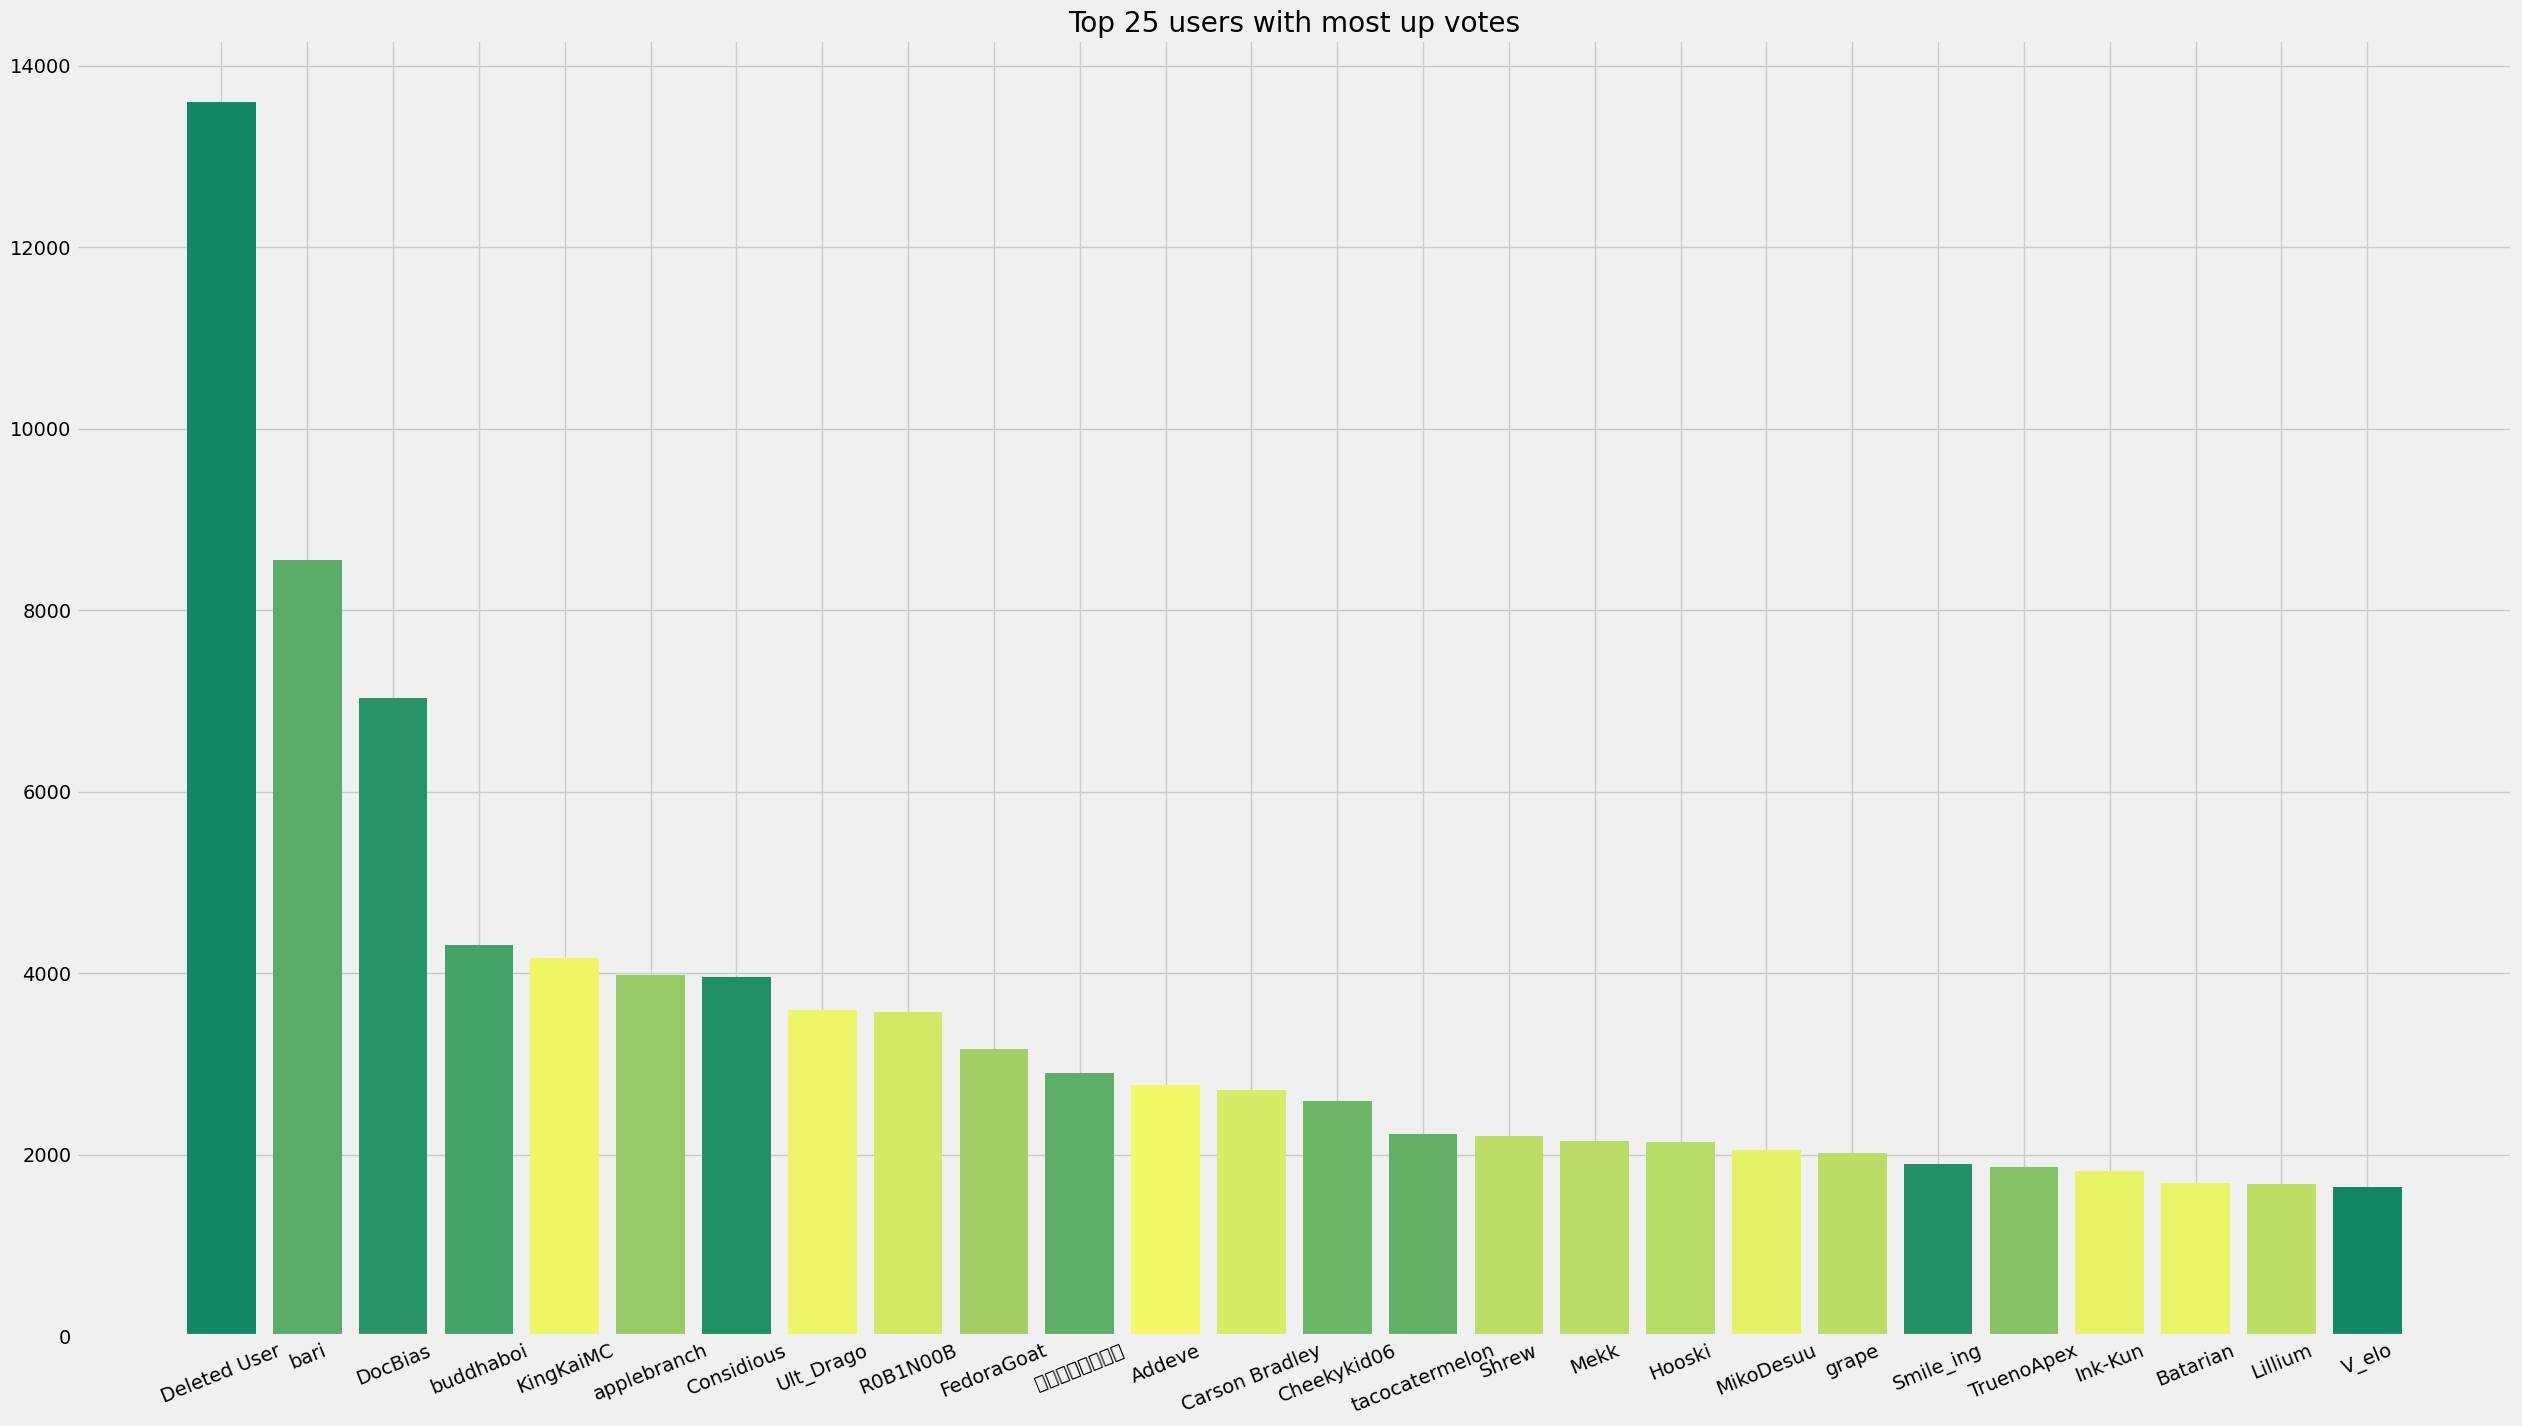

In [428]:
plt.figure(figsize=(28,16))

plt.bar(most_upvote.loc[:25,'username'], most_upvote.loc[:25,'✅_count'], color=get_random_cmap('summer', 25))

plt.title('Top 25 users with most up votes')
plt.xticks(rotation = 22) 
plt.savefig('top_25_upvote.png')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\201463092.py:7: UserWarning: Glyph 120016 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL A}) missing from current font.
  plt.savefig('top_25_downvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\201463092.py:7: UserWarning: Glyph 120043 (\N{MATHEMATICAL BOLD SCRIPT SMALL B}) missing from current font.
  plt.savefig('top_25_downvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\201463092.py:7: UserWarning: Glyph 120050 (\N{MATHEMATICAL BOLD SCRIPT SMALL I}) missing from current font.
  plt.savefig('top_25_downvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\201463092.py:7: UserWarning: Glyph 120048 (\N{MATHEMATICAL BOLD SCRIPT SMALL G}) missing from current font.
  plt.savefig('top_25_downvote.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\201463092.py:7: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from current font.
  plt.savefig('top_25_downvote.png')
C:\Users\LENOVO\AppData

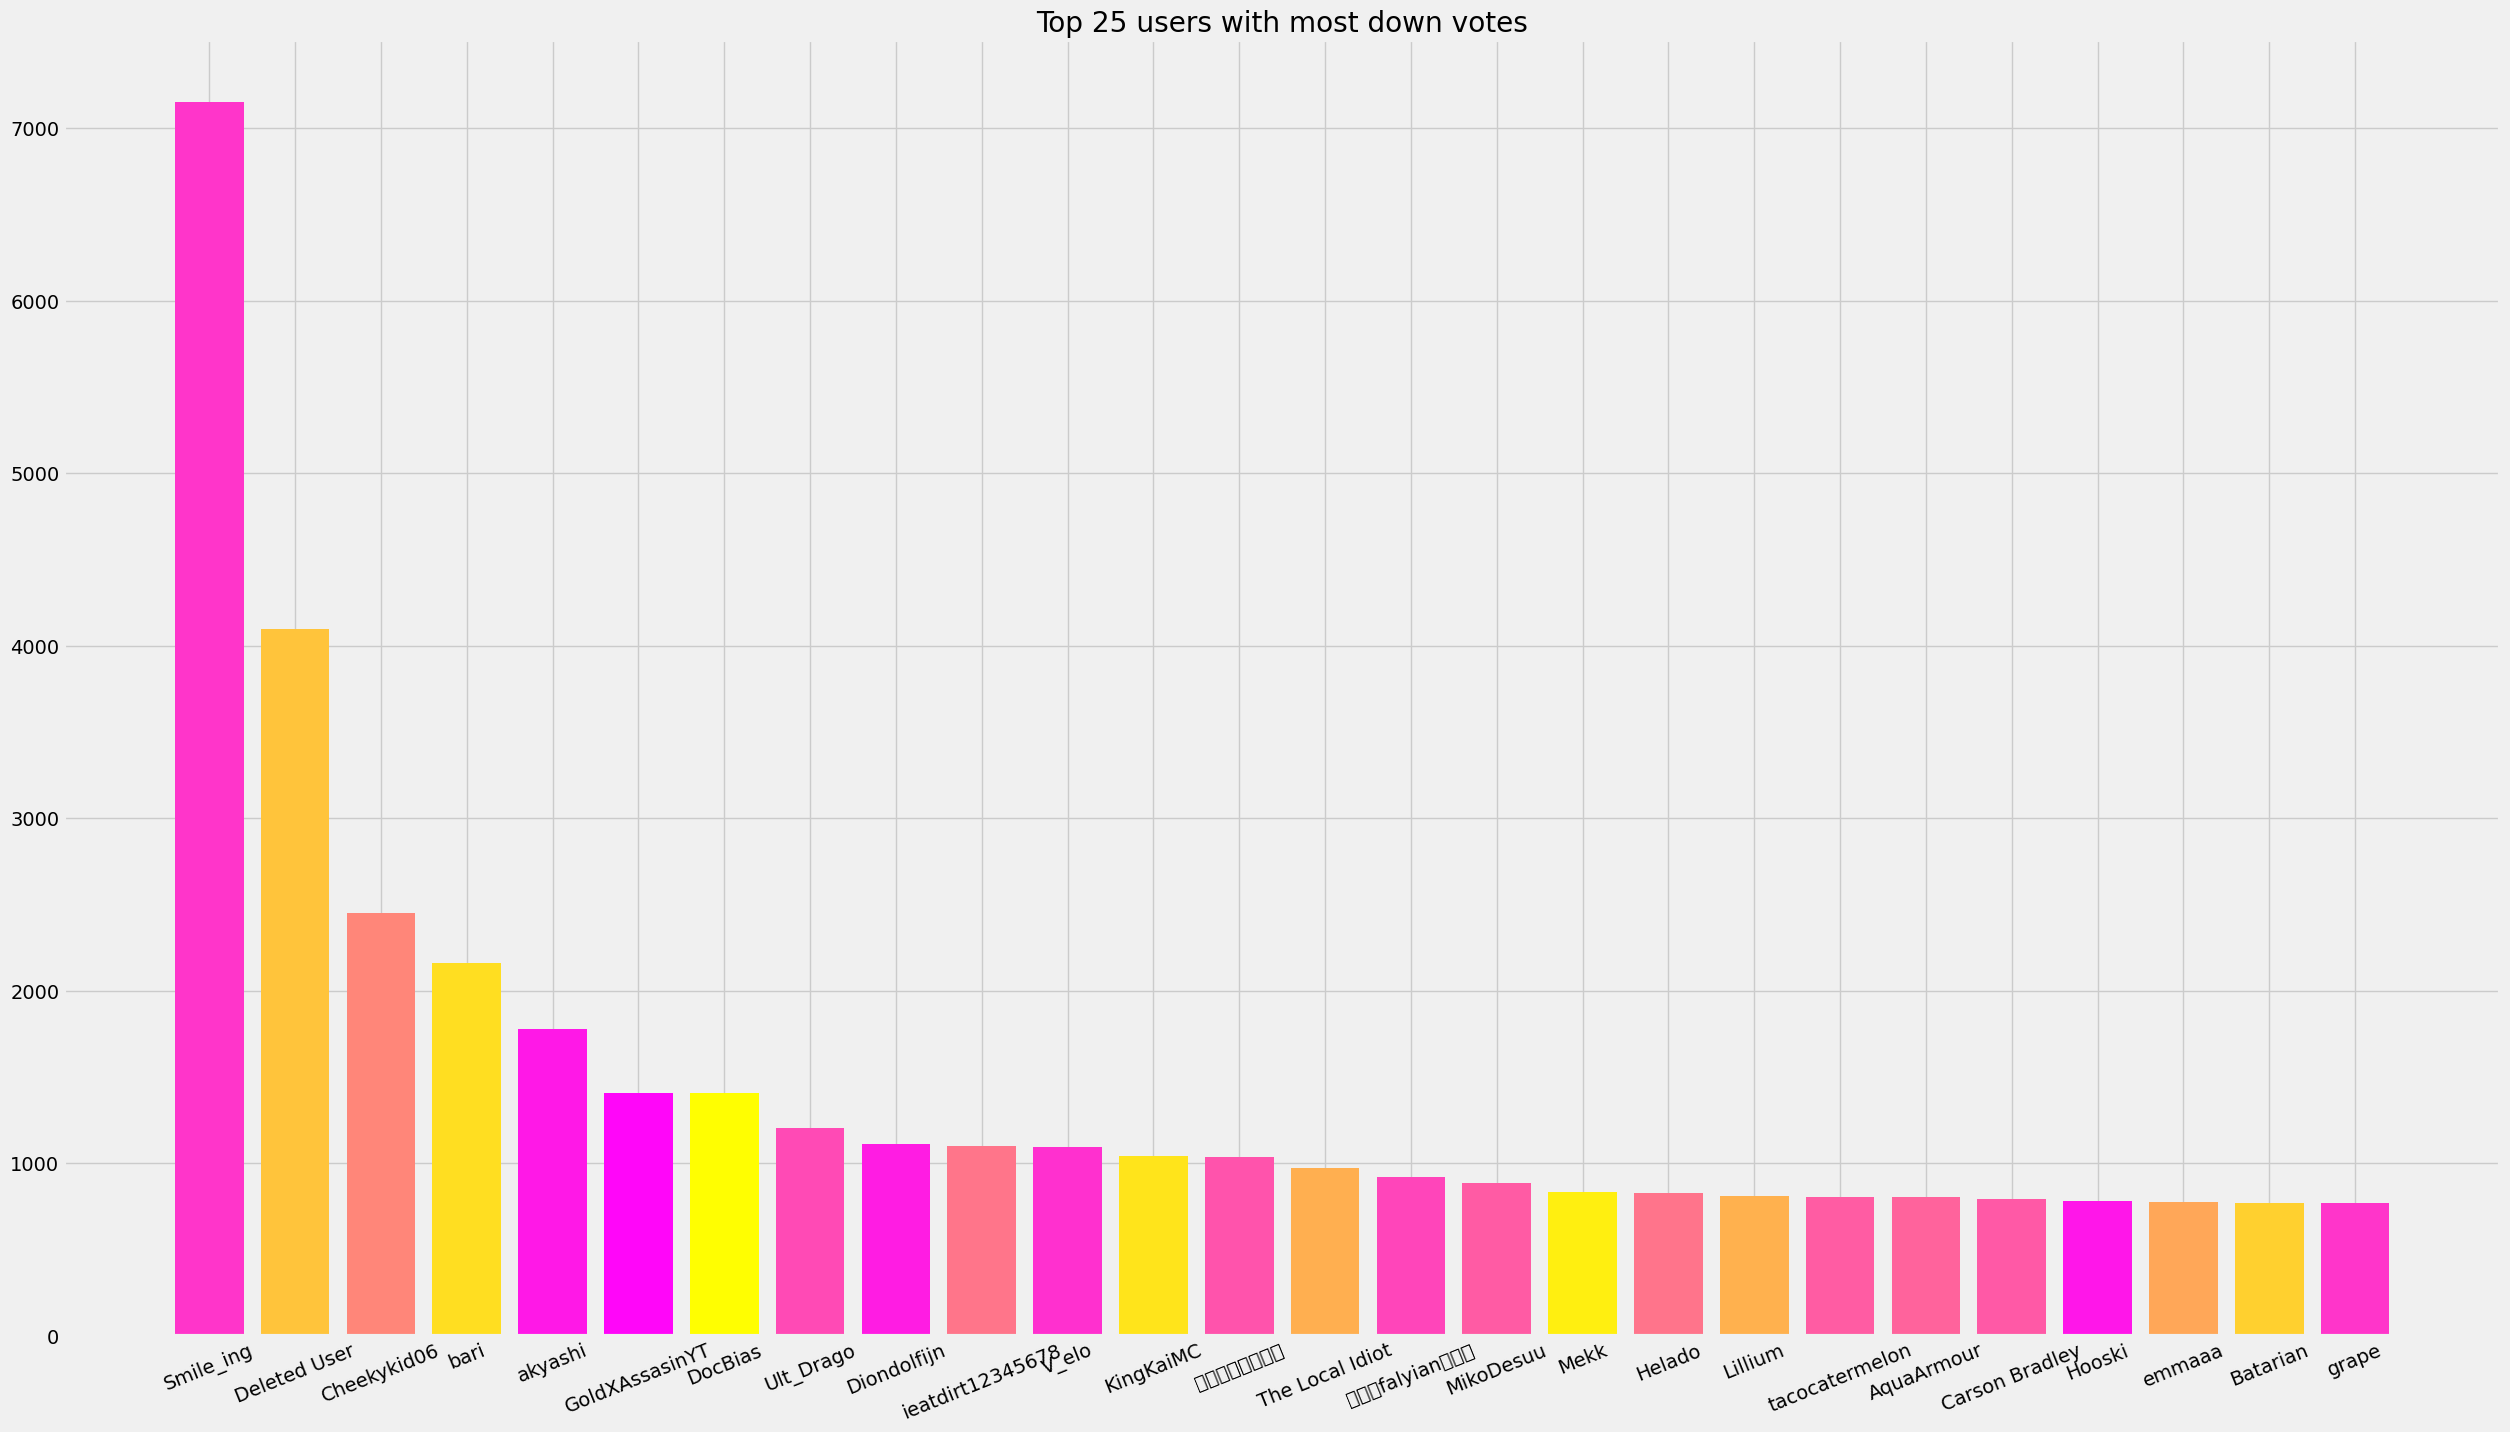

In [304]:
plt.figure(figsize=(28,16))

plt.bar(most_downvote.loc[:25,'username'], most_downvote.loc[:25,'❎_count'], color=get_random_cmap('spring', 25))

plt.title('Top 25 users with most down votes')
plt.xticks(rotation = 22) 
plt.savefig('top_25_downvote.png')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2421182065.py:7: UserWarning: Glyph 120016 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL A}) missing from current font.
  plt.savefig('top_25_suggester.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2421182065.py:7: UserWarning: Glyph 120043 (\N{MATHEMATICAL BOLD SCRIPT SMALL B}) missing from current font.
  plt.savefig('top_25_suggester.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2421182065.py:7: UserWarning: Glyph 120050 (\N{MATHEMATICAL BOLD SCRIPT SMALL I}) missing from current font.
  plt.savefig('top_25_suggester.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2421182065.py:7: UserWarning: Glyph 120048 (\N{MATHEMATICAL BOLD SCRIPT SMALL G}) missing from current font.
  plt.savefig('top_25_suggester.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2421182065.py:7: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from current font.
  plt.savefig('top_25_suggester.png')
C:\Users\LENO

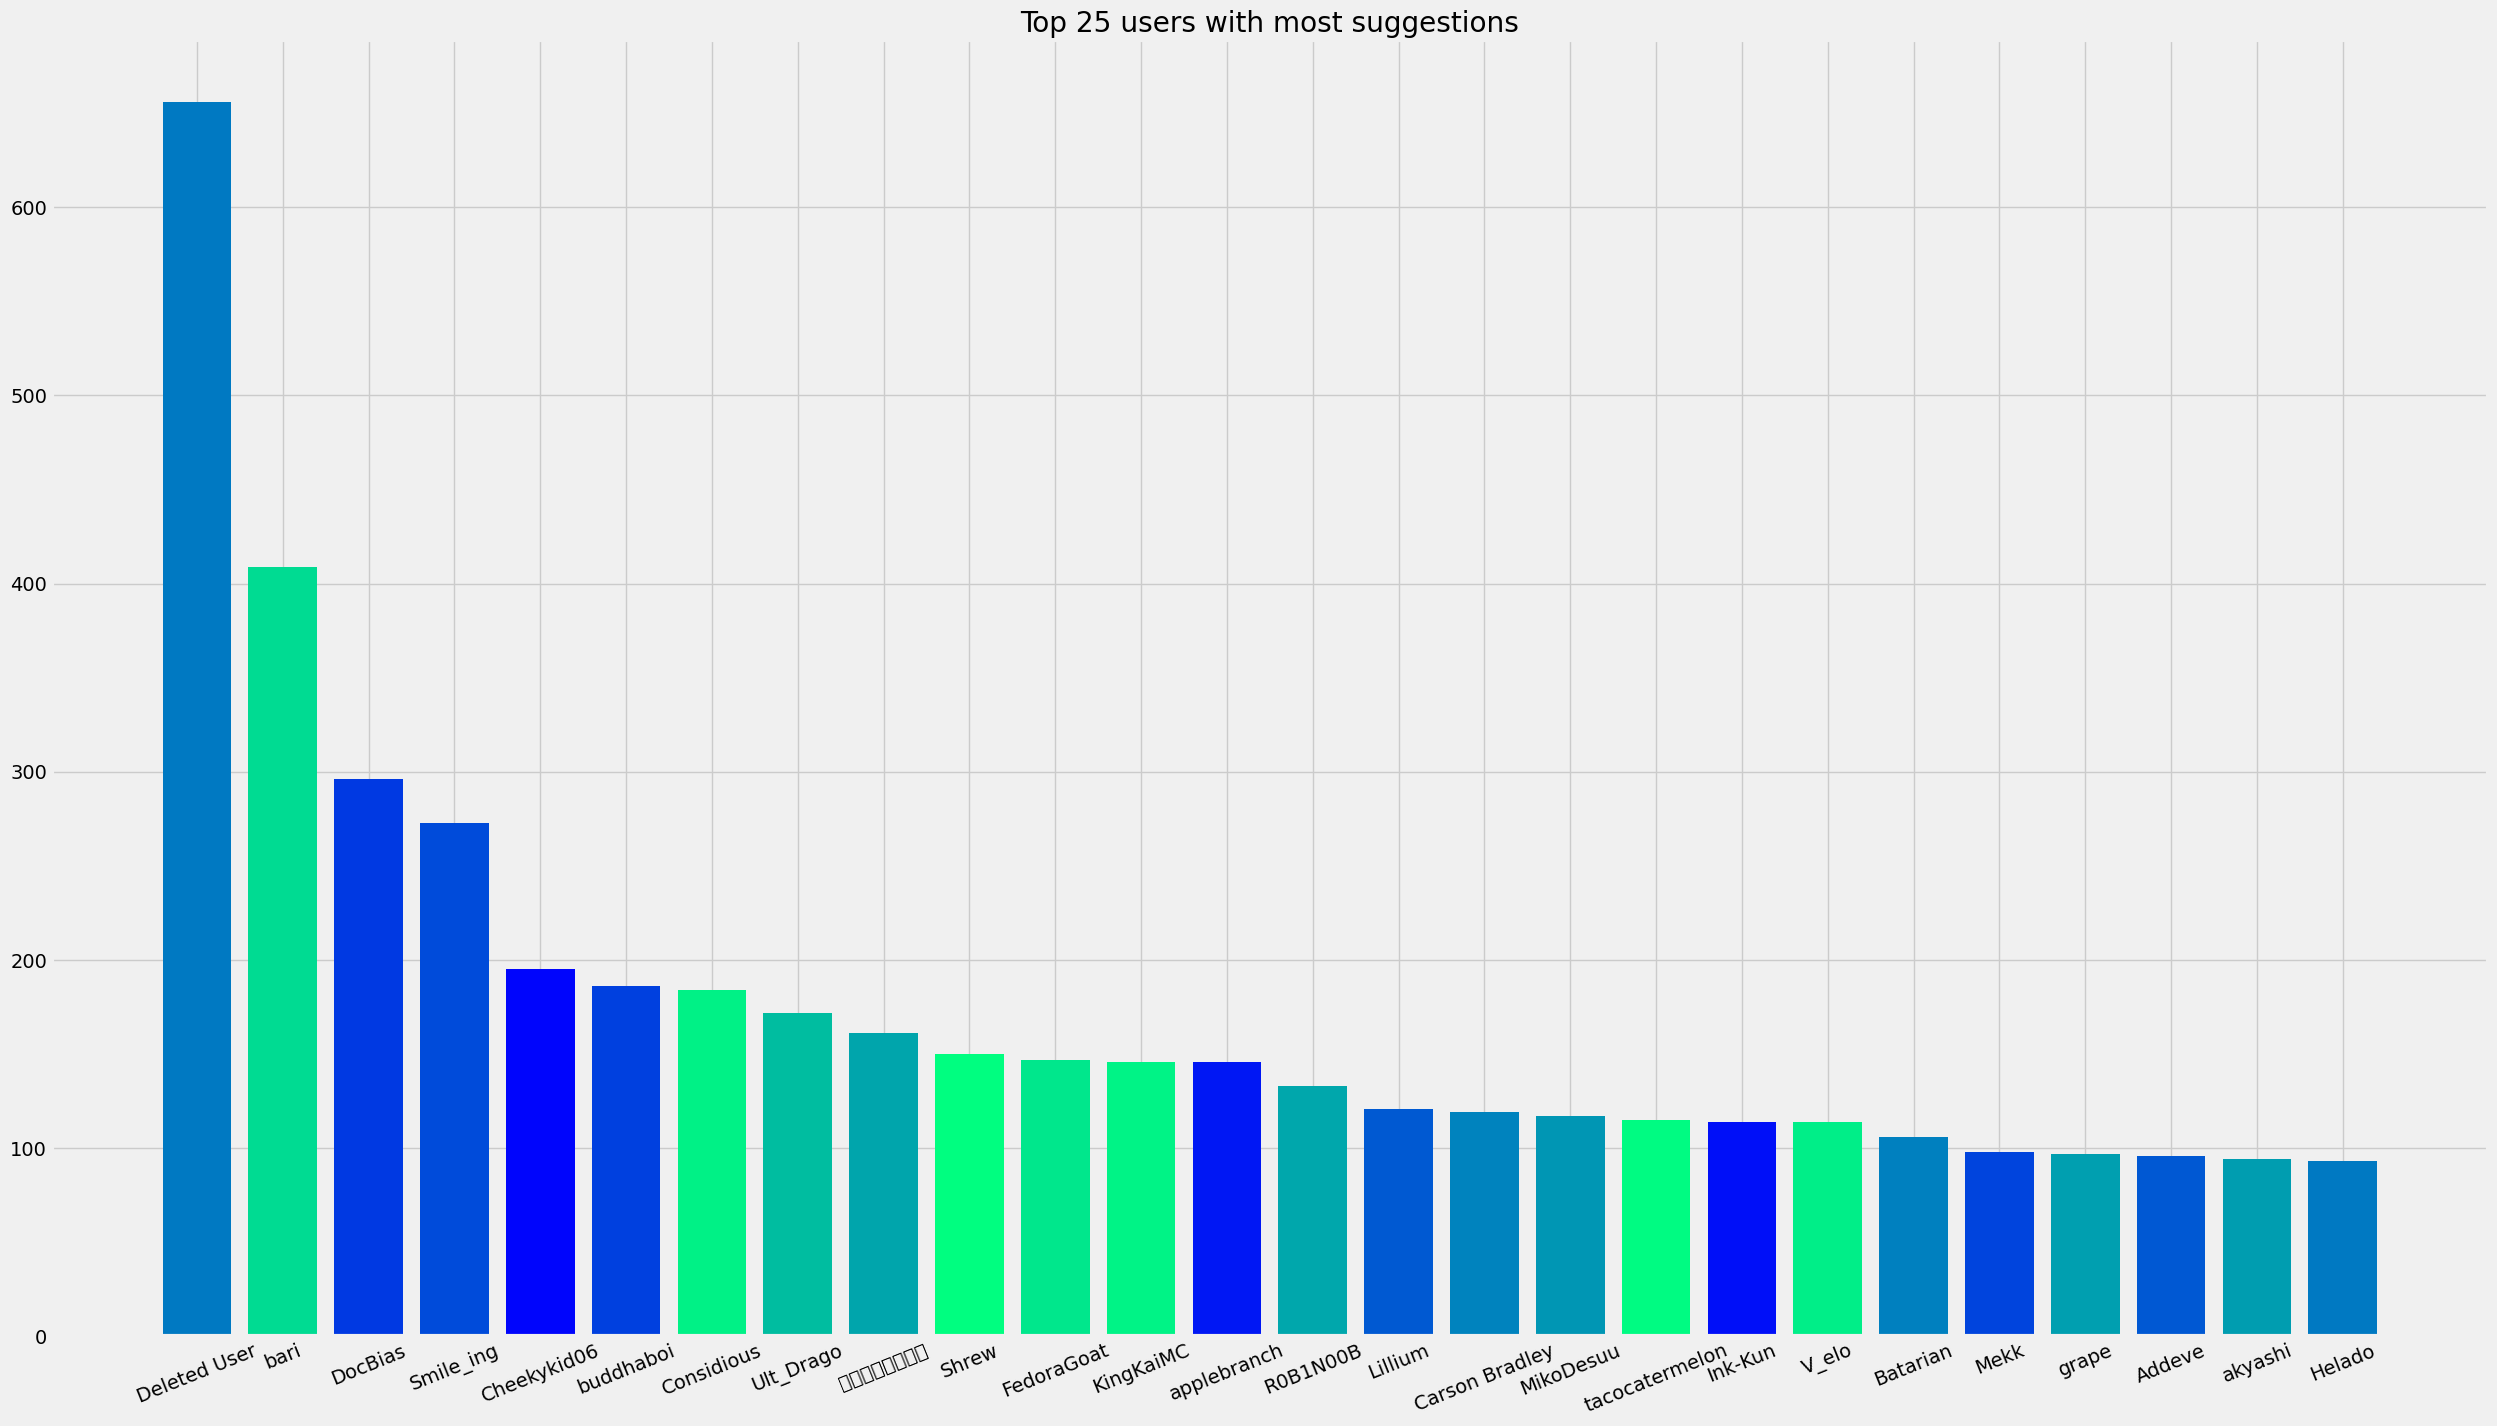

In [310]:
plt.figure(figsize=(28,16))

plt.bar(most_suggestion.loc[:25,'username'], most_suggestion.loc[:25,'suggestion_count'], color=get_random_cmap('winter', 25))

plt.title('Top 25 users with most suggestions')
plt.xticks(rotation = 22) 
plt.savefig('top_25_suggester.png')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3523891674.py:7: UserWarning: Glyph 120016 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL A}) missing from current font.
  plt.savefig('top_25_kekw_count.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3523891674.py:7: UserWarning: Glyph 120043 (\N{MATHEMATICAL BOLD SCRIPT SMALL B}) missing from current font.
  plt.savefig('top_25_kekw_count.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3523891674.py:7: UserWarning: Glyph 120050 (\N{MATHEMATICAL BOLD SCRIPT SMALL I}) missing from current font.
  plt.savefig('top_25_kekw_count.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3523891674.py:7: UserWarning: Glyph 120048 (\N{MATHEMATICAL BOLD SCRIPT SMALL G}) missing from current font.
  plt.savefig('top_25_kekw_count.png')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\3523891674.py:7: UserWarning: Glyph 120042 (\N{MATHEMATICAL BOLD SCRIPT SMALL A}) missing from current font.
  plt.savefig('top_25_kekw_count.png')
C:\Users

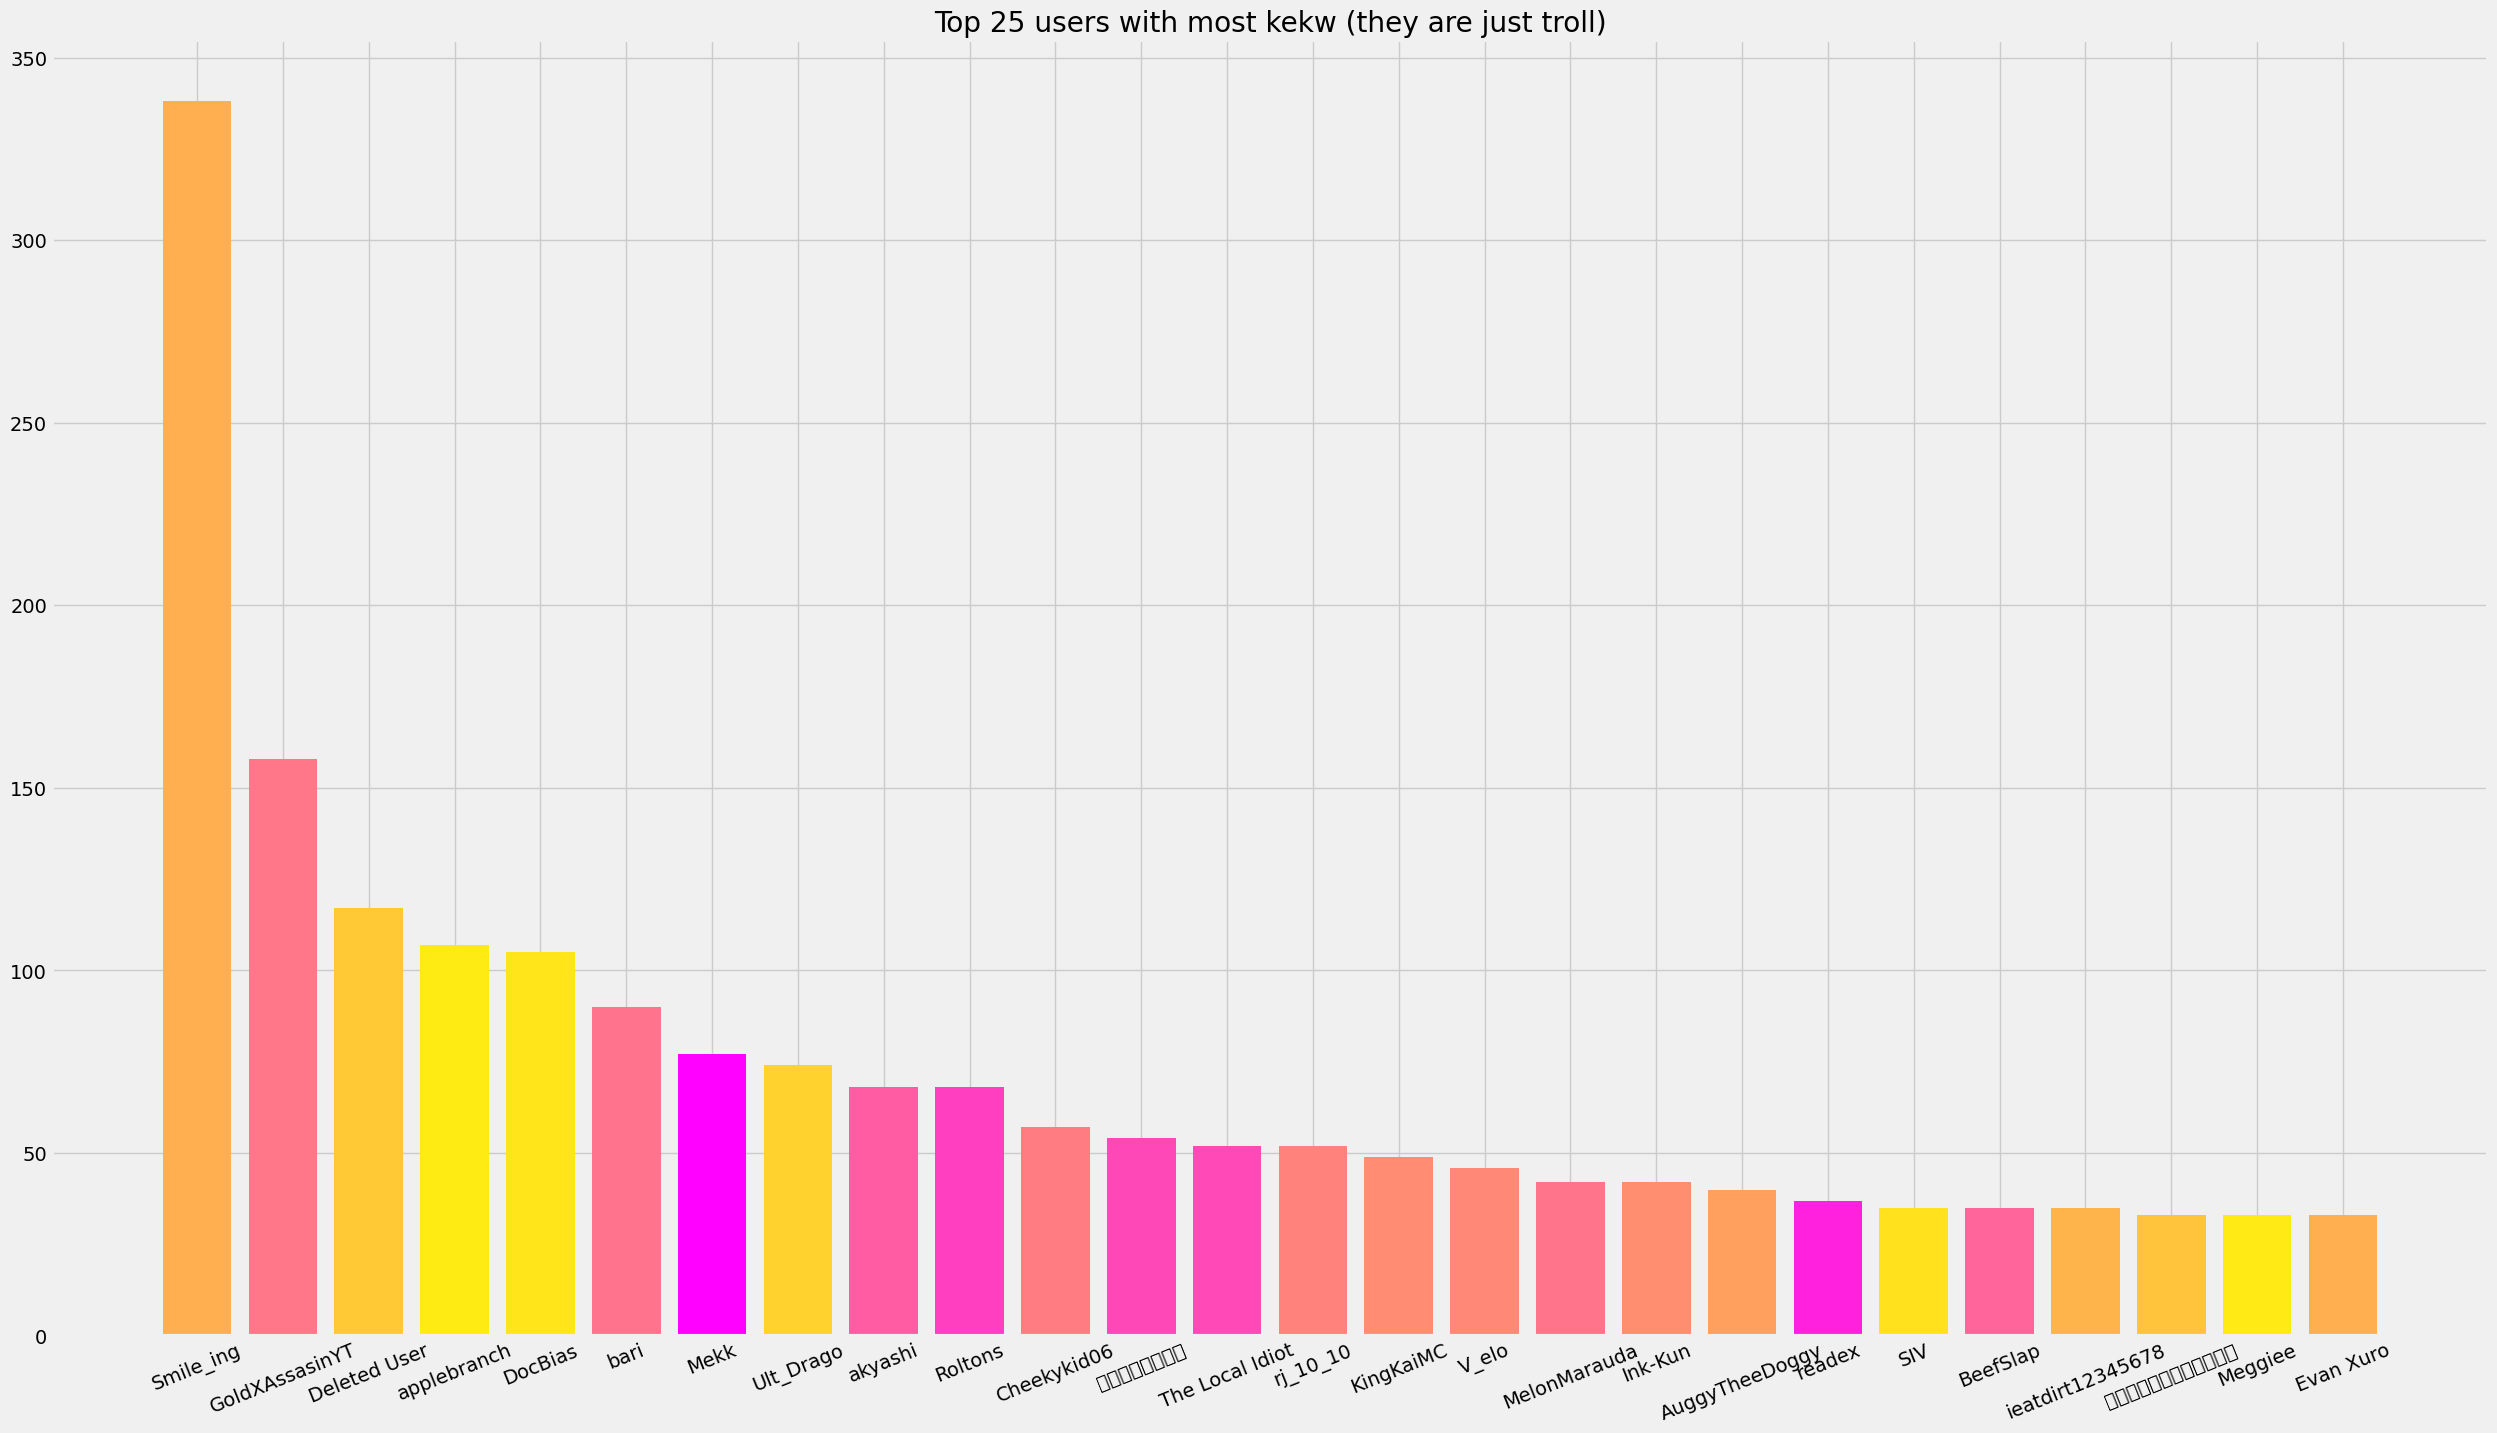

In [314]:
plt.figure(figsize=(28,16))

plt.bar(most_kekw_count.loc[:25,'username'], most_kekw_count.loc[:25,'kekw_count'], color=get_random_cmap('spring', 25))

plt.title('Top 25 users with most kekw (they are just troll)')
plt.xticks(rotation = 22) 
plt.savefig('top_25_kekw_count.png')

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2177790828.py:10: UserWarning: Glyph 5609 (\N{CANADIAN SYLLABICS CARRIER PO}) missing from current font.
  plt.savefig('top_and_lowest_20_upvote_ratio.png', dpi=300, bbox_inches=Bbox([[0, -0.75], [42, 16]]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2177790828.py:10: UserWarning: Glyph 128123 (\N{GHOST}) missing from current font.
  plt.savefig('top_and_lowest_20_upvote_ratio.png', dpi=300, bbox_inches=Bbox([[0, -0.75], [42, 16]]))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6016\2177790828.py:10: UserWarning: Glyph 7356 (\u1cbc) missing from current font.
  plt.savefig('top_and_lowest_20_upvote_ratio.png', dpi=300, bbox_inches=Bbox([[0, -0.75], [42, 16]]))
c:\users\lenovo\pycharmprojects\discord\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5609 (\N{CANADIAN SYLLABICS CARRIER PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\lenovo\pycharmprojects\discord\venv\lib\si

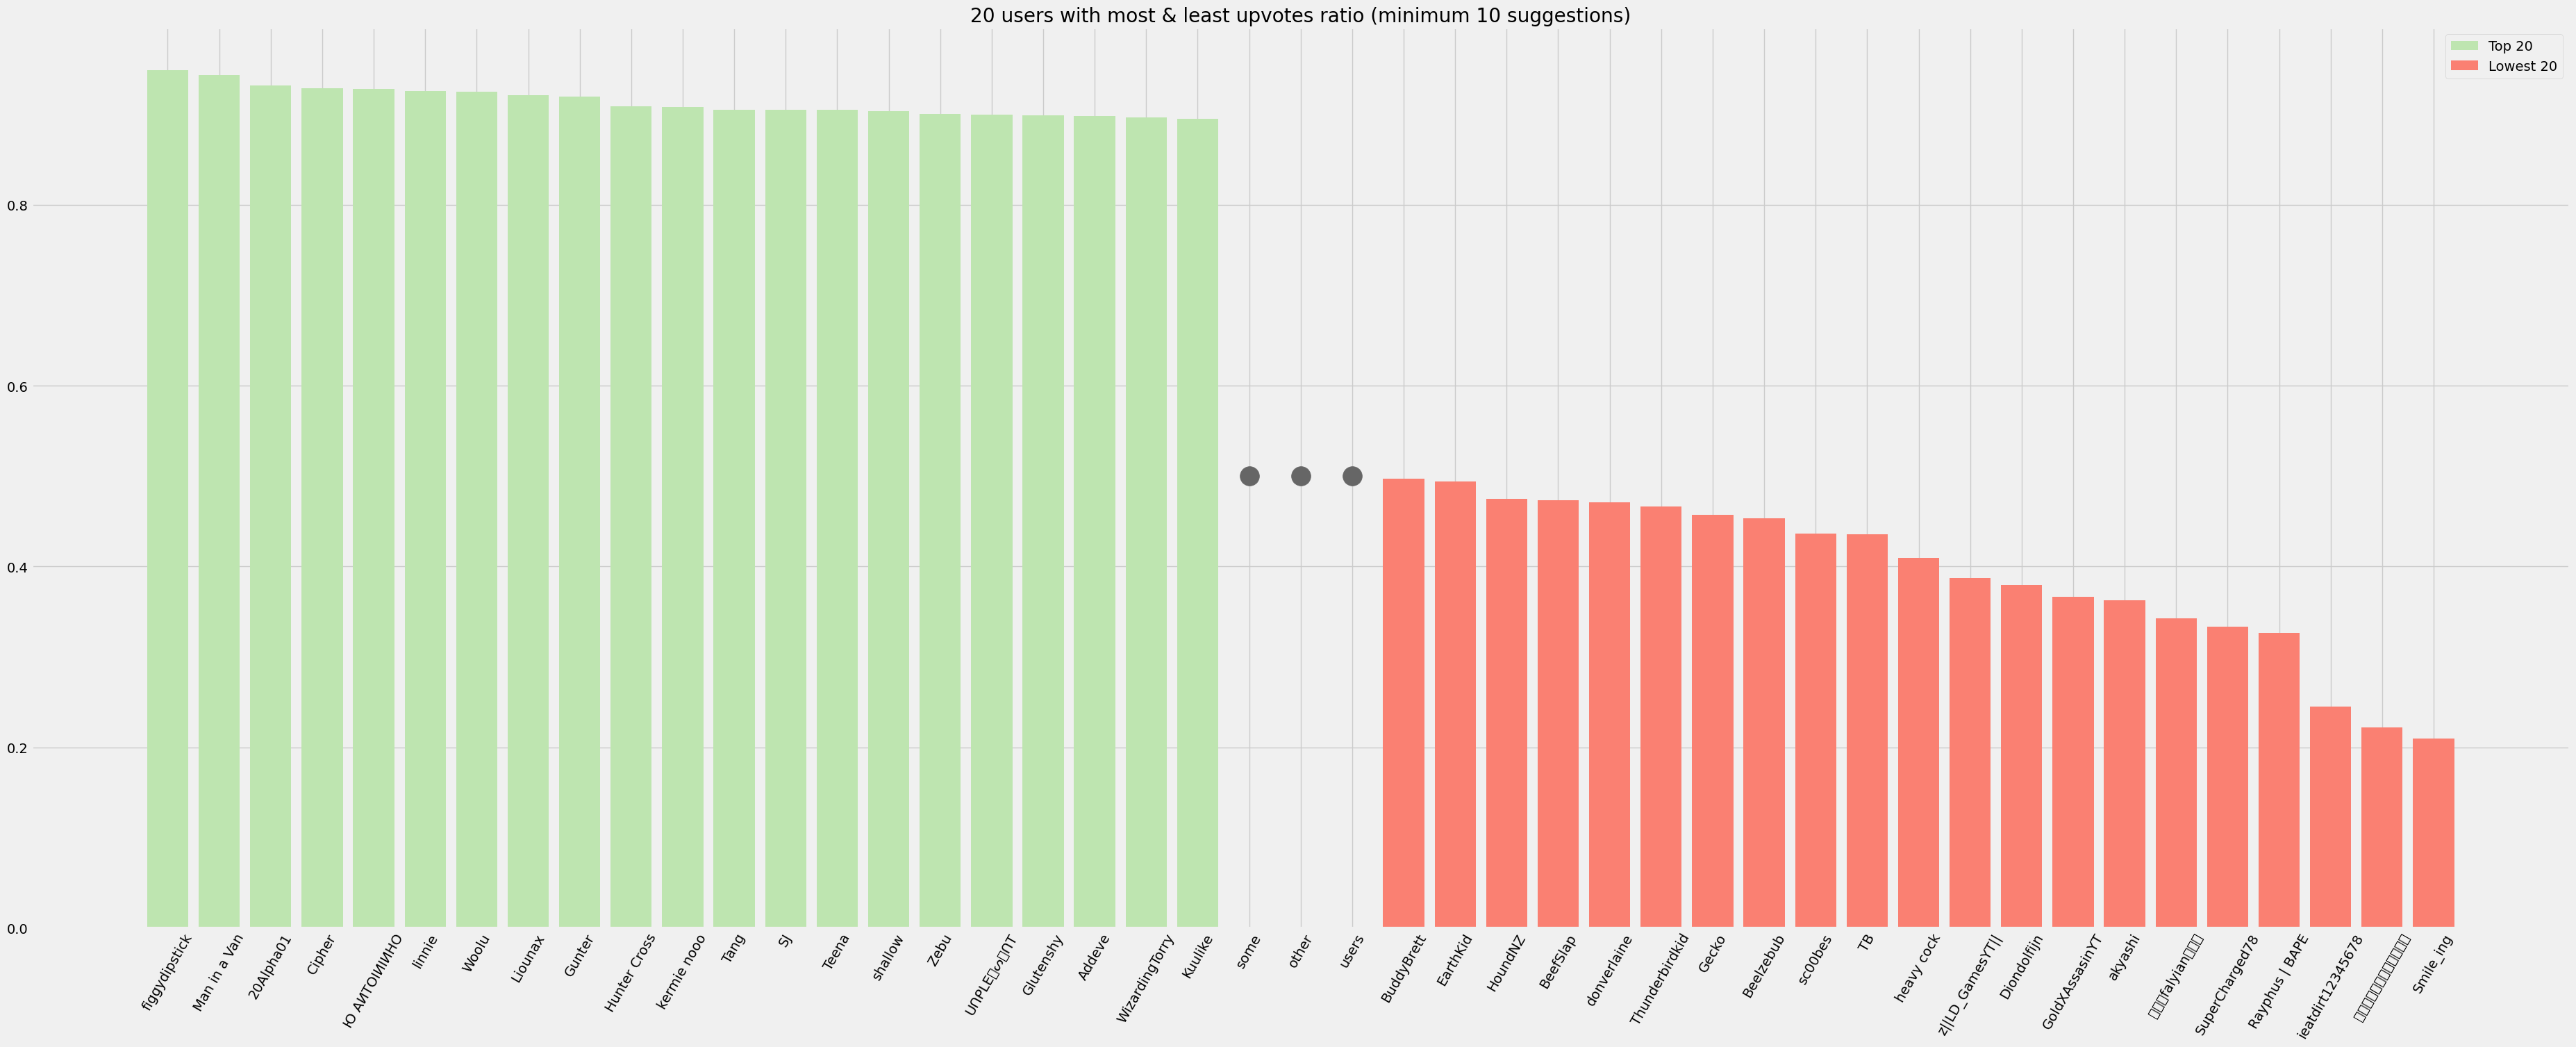

In [427]:
plt.figure(figsize=(42,16))

plt.bar(most_upvote_ratio.loc[:20,'username'].values, most_upvote_ratio.loc[:20,'upvote_ratio'].values, color='#BEE5B0', label='Top 20')
plt.scatter(['some', 'other', 'users'], [0.5, 0.5, 0.5], color='#666666', s=400)
plt.bar(np.flip(least_upvote_ratio.loc[:20,'username'].values), np.flip(least_upvote_ratio.loc[:20,'upvote_ratio'].values), color='#FA8072', label='Lowest 20')

plt.title('20 users with most & least upvotes ratio (minimum 10 suggestions)')
plt.xticks(rotation = 60) 
plt.legend()
plt.savefig('top_and_lowest_20_upvote_ratio.png', dpi=300, bbox_inches=Bbox([[0, -0.75], [42, 16]]))

plt.show()